In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [59]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
df['Total_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']

In [61]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_Spend', ylabel='Sales'>

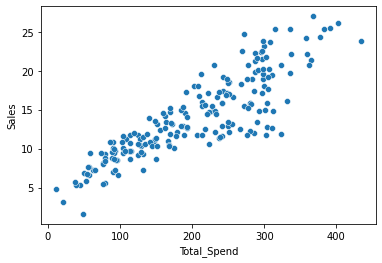

In [62]:
sns.scatterplot(data = df, x = 'Total_Spend', y = 'Sales')

In the above scatter plot its clearly says that more we spend on advertising the more sales are getting and figure shows a postivie regression fit.

<AxesSubplot:xlabel='Total_Spend', ylabel='Sales'>

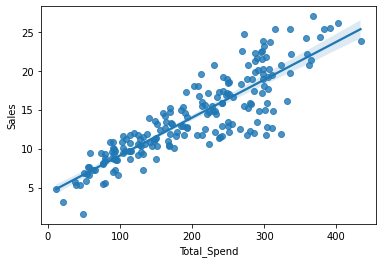

In [63]:
sns.regplot(data = df, x = 'Total_Spend', y = 'Sales')

The above figure shows a simple regression plot, This can be drawn when we have a single feature (i,e x) and this shows a best fit of the line (i,e y = mx + b) from this best fit line we can predict the expected sales by any total_spend i,e if we have Total_spend 400,000$ we can expect best sale around 23000$.

In [64]:
X = df['Total_Spend']
y = df['Sales']

In [65]:
# y = mx + b
# y = B1x + B0
# help(np.polyfit)

In [66]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

In [67]:
potential_spend = np.linspace(0, 500, 100)

In [68]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822
# predicted_sales

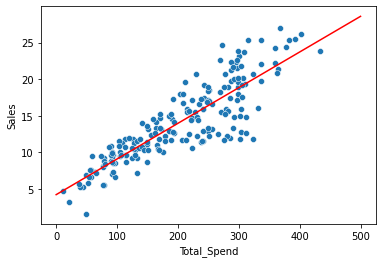

In [69]:
sns.scatterplot(x = 'Total_Spend', y = 'Sales', data = df)
plt.plot(potential_spend, predicted_sales, color = 'red')

In [70]:
spend  = 200

predicted_sales = 0.04868788 * spend + 4.24302822
predicted_sales

13.98060422

In [71]:
np.polyfit(X, y, deg = 3) # B values i,e Parameters (theta3, theta2, theat1, theata0)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [72]:
# y = B1x + B0

# y = B3X**3 + B2x**2 + B1x + B0

In [73]:
pot_spend = np.linspace(0, 500, 100) # x

In [74]:
pred_sales = 3.07615033e-07 * pot_spend**3 + -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00
pred_sales # y

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

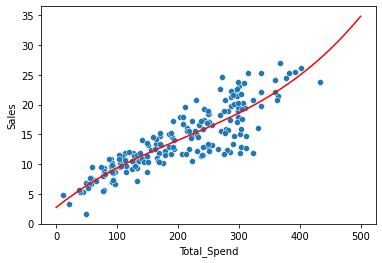

In [75]:
sns.scatterplot(x = 'Total_Spend', y = 'Sales', data = df)
plt.plot(pot_spend, pred_sales, color = 'red')

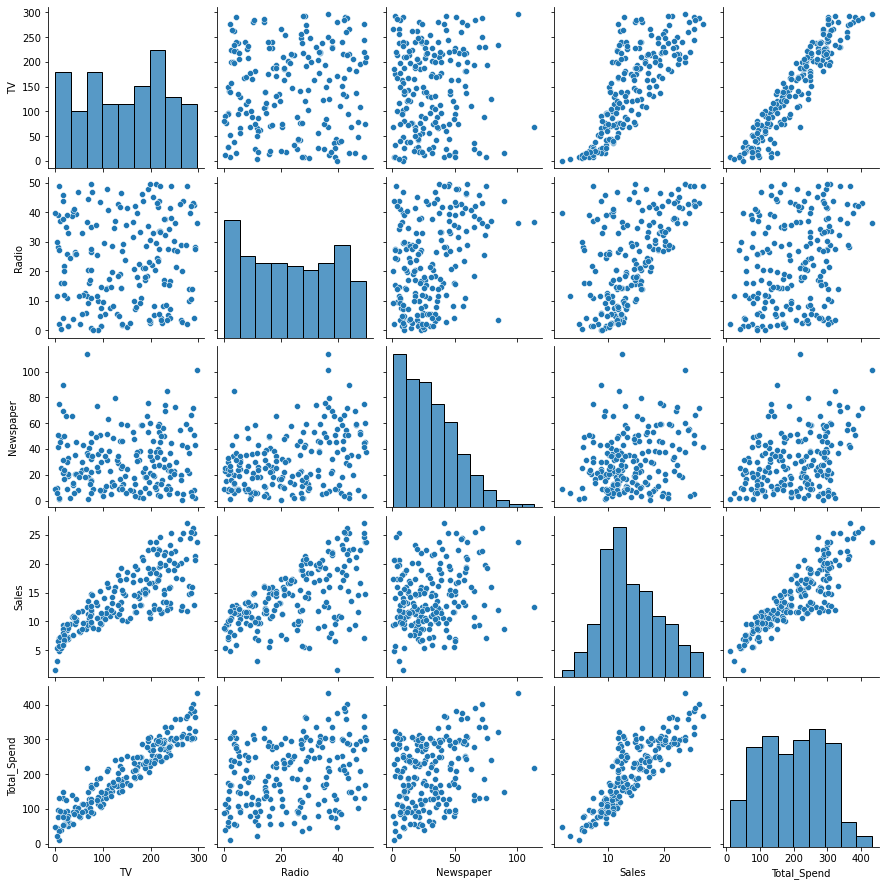

In [76]:
sns.pairplot(df)

In [77]:
X = df.drop(['Sales', 'Total_Spend'], axis = 1)

In [78]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [79]:
y = df['Sales']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
len(df)

200

In [83]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [84]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [85]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [86]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

model.fit(X_train, y_train)

LinearRegression()

In [88]:
prediction = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, prediction) # Assolute mean square error

1.4607567168117603

In [90]:
# Mean Squared Error
mean_squared_error(y_test, prediction)

3.174097353976104

In [91]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, prediction))

1.7815996615334502

In [92]:
df['Sales'].mean()

14.0225

<AxesSubplot:xlabel='Sales', ylabel='Count'>

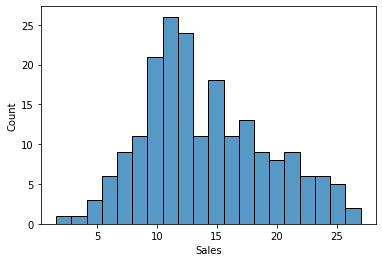

In [93]:
sns.histplot(data = df, x = 'Sales', bins = 20)

In [94]:
test_residuals = y_test - prediction

In [95]:
# test_residuals

In [96]:
# help(LinearRegression)

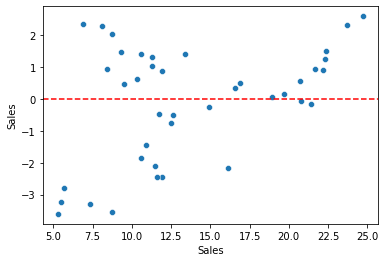

In [97]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

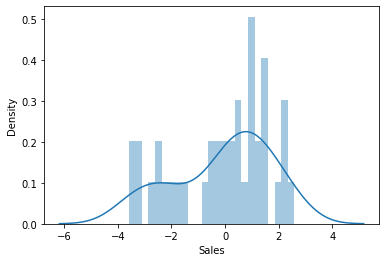

In [98]:
sns.distplot(test_residuals, bins = 25, kde = True)

In [100]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [101]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [102]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [103]:
y_hat = final_model.predict(X)

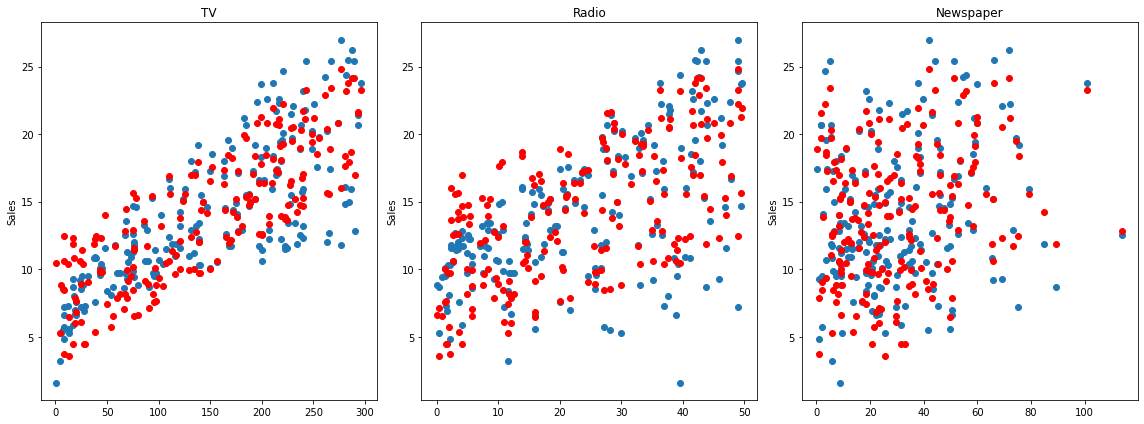

In [107]:
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color = 'red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio')

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color = 'red')
axes[2].set_title('Newspaper')
axes[2].set_ylabel('Sales')
plt.tight_layout();

The above plot shows the predicted i,e Y-hat and actual data points corrosponding to each features i, TV, Radio, Newspaper. Predicted points are in Red colour and actual points are in Blue colour

In [108]:
from joblib import dump, load

In [109]:
dump(final_model, 'Final_Sales_model.joblib')

['Final_Sales_model.joblib']

In [110]:
loaded_model = load('Final_Sales_model.joblib')

In [111]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [113]:
X.shape

(200, 3)

In [116]:
# 149 TV, 22 Radio, 12 Newspaper what is the sales for this mentioned features
campaign = [[149, 22, 12]]

In [117]:
loaded_model.predict(campaign)

array([13.893032])